<a href="https://colab.research.google.com/github/kamaldyaz/computer_vison/blob/main/CLIP_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_folder = "/content/drive/MyDrive/computer_vision/Clip_search/images"

In [ ]:
import os

image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('png', 'jpg', 'jpeg'))]
images = [Image.open(file) for file in image_files]


In [ ]:
target_image_path = "/content/drive/MyDrive/computer_vision/Clip_search/images/cat1.jpg"

In [ ]:
target_image = Image.open(target_image_path)

In [ ]:
def extract_features(images):
    inputs = processor(images=images, return_tensors="pt", padding=True)
    with torch.no_grad():
        features = model.get_image_features(**inputs)
    return features

target_features = extract_features([target_image])
image_features = extract_features(images)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(target_features, image_features).flatten()

indices = similarities.argsort()[::-1]

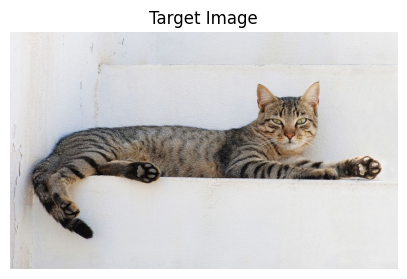

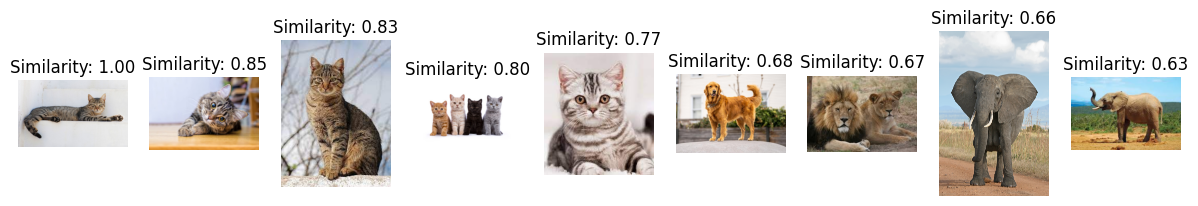

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(target_image)
plt.title("Target Image")
plt.axis("off")
plt.show()


plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[idx])
    plt.title(f"Similarity: {similarities[idx]:.2f}")
    plt.axis("off")
plt.show()

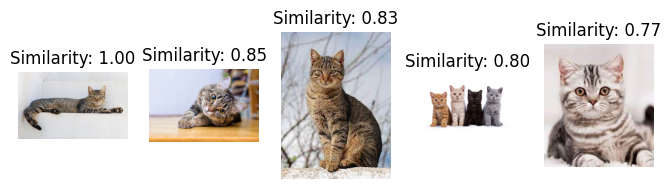

In [ ]:
threeshold = 0.75

filtered_indices = [i for i, sim in enumerate(similarities) if sim >= threeshold]

filtered_indices = sorted(filtered_indices, key=lambda i: similarities[i], reverse=True)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(filtered_indices):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[idx])
    plt.title(f"Similarity: {similarities[idx]:.2f}")
    plt.axis("off")
plt.show()